# Exploratory Data Analysis

This notebook is to perform exploratory data analysis (EDA) on the merged dataset which involves EPA Air Quality System (AQS) and CDC Places datasets. The goal is to understand the underlying patterns and relationships in the data, identify any anomalies or outliers, and gather insights on how diabetes and hypertension prevalence relate to air quality indicators and other control factors.

## 1. Import Libraries and Load Data

Import necessary libraries and load the merged dataset for analysis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from utils import build_dataset

sns.set_theme(style="whitegrid", context="notebook")

In [2]:
df = build_dataset()

## 2. Dataset Overview

The datasets consist of census-tract-level data from the United States, combining air quality measurements from the EPA AQS with health outcome data from the CDC Places dataset all aggregated to county level. 

EPA AQS Dataset contains air quality measurements such as PM2.5, PM10, Ozone, AQI levels. In order to focus on relevant air quality indicators, we selected key PM2.5 variable to understand air pollution effects on health outcomes.

CDC Places Dataset includes health outcome variables such as the prevalence of diabetes and hypertension, along with various demographic and lifestyle control variables (e.g., lack of health insurance, binge drinking, routine checkup, smoking etc.). In this analysis, we specifically focused on diabetes and hypertension prevalence as the primary health outcomes of interest and took into account several control variables to adjust for potential confounding factors to show the relationship between air quality and health outcomes more accurately.

The merging of these two datasets was performed based on the common census tract ids to ensure accurate alignment of air quality data with corresponding health outcome data for each county.

Also, urbanization level was included as a categorical variable to account for differences in urban and rural settings that may influence both air quality and health outcomes.

The merged dataset contains the following key variables:
- **Air Quality Indicators**: PM2.5 levels.
- **Health Outcomes**: Prevalence of diabetes, prevalence of hypertension.
- **Control Variables**: Demographic factors (lack of health insurance, binge drinking, routine checkup, smoking, no leisure time physical activity, obesity, frequent physical distress, food insecurity, housing insecurity, urbanization level).


In this part of the notebook, we will inspect some samples from dataset, show dataset structure, check for missing values, and describe the the data using summary statistics.

In [3]:
df.head()

,state_name,county_name,diabetes,hypertension,avg_pm25,smoking,obesity,no_lt_physical_activity,binge_drinking,lack_of_health_insurance,routine_checkup,food_insecurity,housing_insecurity,urbanization_level,total_population
0,Alabama,Autauga,12.801106,39.766772,9.368209,15.732203,38.518095,27.021571,15.653033,9.485857,78.792370,14.168051,12.590560,3.0,52330.0
1,Alabama,Baldwin,13.562457,38.971898,9.032785,15.251463,37.481267,26.099429,15.721423,9.543464,79.588085,12.430609,10.867041,4.0,220883.0
2,Alabama,Barbour,19.228656,48.830900,9.384510,22.378557,44.051119,36.492743,12.373823,16.273083,80.722836,28.030746,22.300066,5.0,18230.0
3,Alabama,Bibb,14.097975,41.093925,8.611423,22.432185,42.773783,32.354352,16.336234,13.583197,76.351012,20.779147,17.391900,2.0,7457.0
4,Alabama,Blount,13.682667,40.040971,8.895551,18.004993,37.280192,29.939611,15.544167,12.557489,78.048988,15.312283,12.549099,2.0,46985.0


In [4]:
print("Shape (rows, columns):", df.shape)
df.info()

Shape (rows, columns): (2031, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_name                2031 non-null   object 
 1   county_name               2031 non-null   object 
 2   diabetes                  2031 non-null   float64
 3   hypertension              2031 non-null   float64
 4   avg_pm25                  2031 non-null   float64
 5   smoking                   2031 non-null   float64
 6   obesity                   2031 non-null   float64
 7   no_lt_physical_activity   2031 non-null   float64
 8   binge_drinking            2031 non-null   float64
 9   lack_of_health_insurance  2031 non-null   float64
 10  routine_checkup           2031 non-null   float64
 11  food_insecurity           2031 non-null   float64
 12  housing_insecurity        2031 non-null   float64
 13  urbanization_level        203

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diabetes,2031.0,13.597653,2.750642,4.537218,11.680177,13.364324,15.307406,2.740000e+01
hypertension,2031.0,37.752083,5.578471,16.395235,33.856118,37.526614,41.404985,5.829666e+01
avg_pm25,2031.0,8.175412,1.333665,3.288574,7.381473,8.386428,9.058147,1.722925e+01
smoking,2031.0,17.702687,3.766216,6.736687,15.102622,17.491399,20.087298,3.360000e+01
obesity,2031.0,38.303119,4.583944,17.935459,35.745733,38.867802,41.300000,5.540000e+01
no_lt_physical_activity,2031.0,28.173418,5.346484,13.790545,24.483556,28.047072,31.804510,5.090000e+01
binge_drinking,2031.0,16.342495,2.645023,8.900000,14.435361,16.200000,18.005376,2.544129e+01
lack_of_health_insurance,2031.0,11.857806,5.937136,2.932645,7.719355,10.471750,13.938863,5.200000e+01
routine_checkup,2031.0,76.340084,3.480866,62.670143,74.309381,77.018929,78.762897,8.502217e+01
food_insecurity,2031.0,16.056049,6.069652,5.662521,11.614507,14.834889,18.898689,5.510000e+01


In [6]:
df.isnull().sum()

state_name                  0
county_name                 0
diabetes                    0
hypertension                0
avg_pm25                    0
smoking                     0
obesity                     0
no_lt_physical_activity     0
binge_drinking              0
lack_of_health_insurance    0
routine_checkup             0
food_insecurity             0
housing_insecurity          0
urbanization_level          0
total_population            0
dtype: int64

In [7]:
variables_of_interest = df.columns.tolist()
variables_of_interest.remove('state_name')
variables_of_interest.remove('county_name')
variables_of_interest.remove('total_population')
variables_of_interest

['diabetes',
 'hypertension',
 'avg_pm25',
 'smoking',
 'obesity',
 'no_lt_physical_activity',
 'binge_drinking',
 'lack_of_health_insurance',
 'routine_checkup',
 'food_insecurity',
 'housing_insecurity',
 'urbanization_level']

## 3. Univariate Analysis

This section inspects the marginal distributions of the main variables to understand their ranges, central tendencies, and dispersion before any pairwise or multivariable analysis.

We focus on the following groups of variables:
- **Air quality**: PM2.5 exposure (`pm25_days`) to assess its overall distribution and any extreme values.
- **Health outcomes**: Diabetes and hypertension prevalence to check their spread, and skewness.
- **Control and behavioral factors**: Variables such as obesity, smoking, lack of health insurance, physical inactivity, and others that may act as confounders or covariates in later models.

For each variable we will: examine histograms and boxplots, and note skewness or outliers that may require transformation or special handling in modelling.


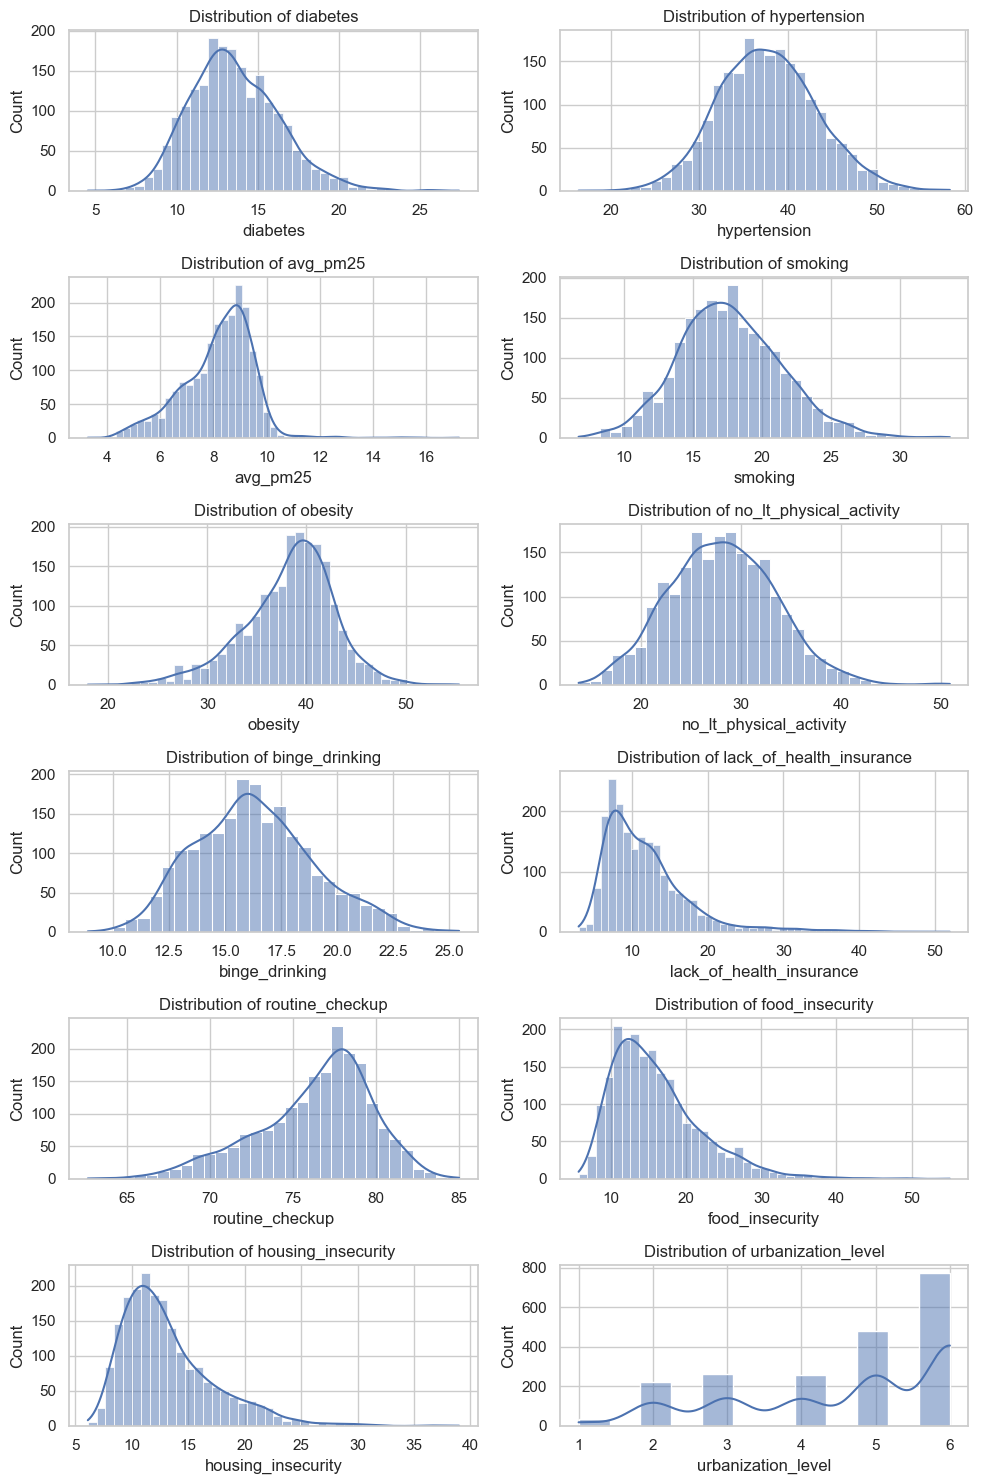

In [8]:
fig, axes = plt.subplots(len(variables_of_interest)//2, 2, figsize=(10, 15))
for col in variables_of_interest:
    if col not in df.columns:
        continue
        
    ax = axes.flatten()[variables_of_interest.index(col)]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()  

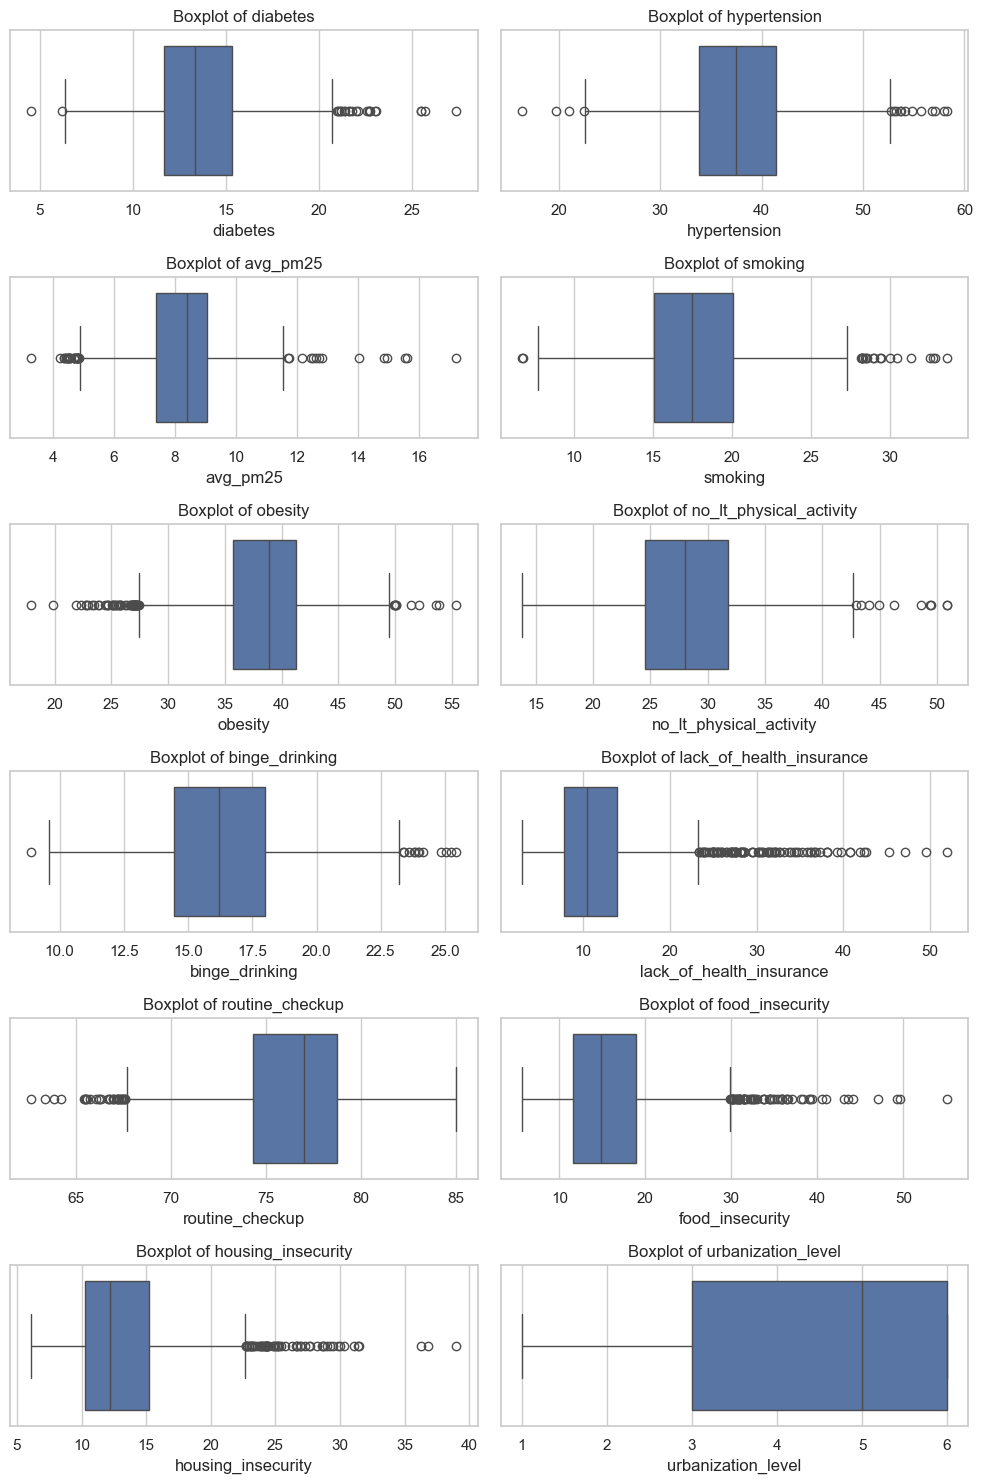

In [9]:
fig, axes = plt.subplots(len(variables_of_interest)//2, 2, figsize=(10, 15))
for col in variables_of_interest:
    ax = axes.flatten()[variables_of_interest.index(col)]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 4. Bivariate Analysis: PM2.5 vs Disease Outcomes

This section examines pairwise relationships between PM2.5 exposure and each health outcome (diabetes and hypertension) to identify potential associations and the form of those associations.

We will use scatterplots with fitted regression lines to visually inspect linearity, clusters, and potential outliers.

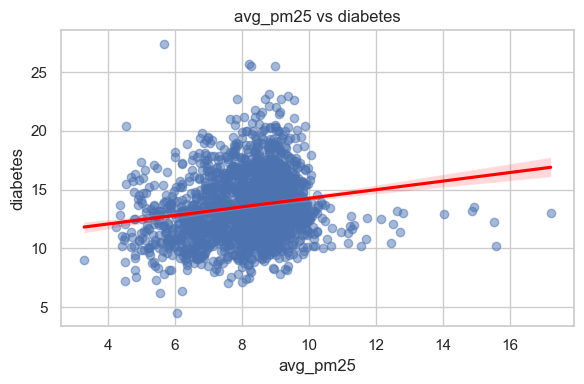

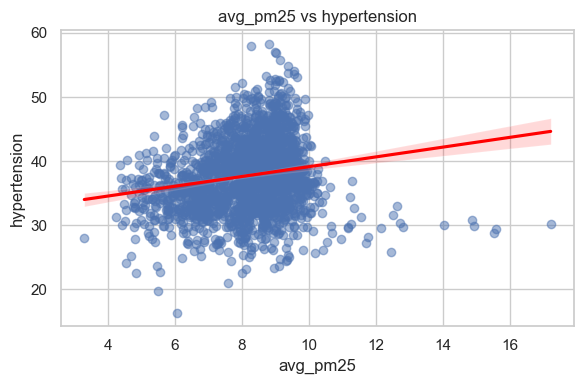

In [10]:
pairs = [
    ("avg_pm25", "diabetes"),
    ("avg_pm25", "hypertension")
]

for x, y in pairs:
    if x not in df.columns or y not in df.columns:
        continue
        
    plt.figure(figsize=(6, 4))
    sns.regplot(x=x, y=y, data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f"{x} vs {y}")
    plt.tight_layout()
    plt.show()


Plot quantile boxplots of disease prevalence across PM2.5 quartiles to see how disease rates change with increasing pollution levels.

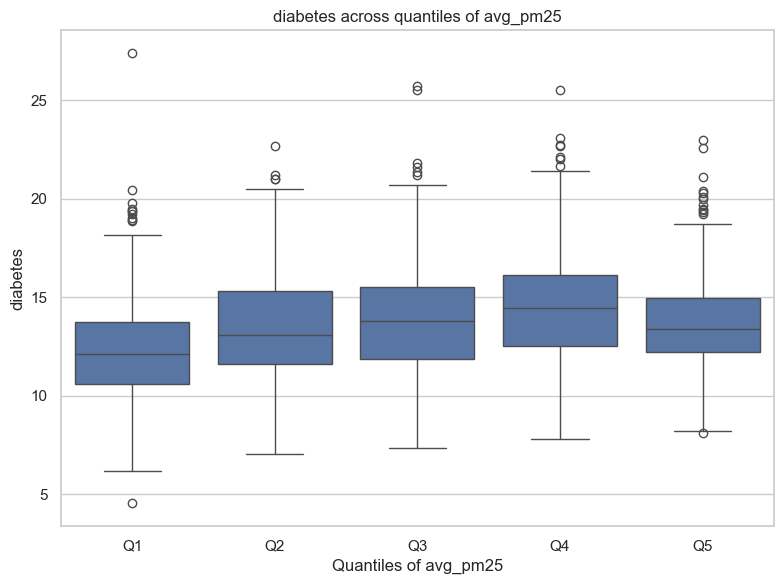

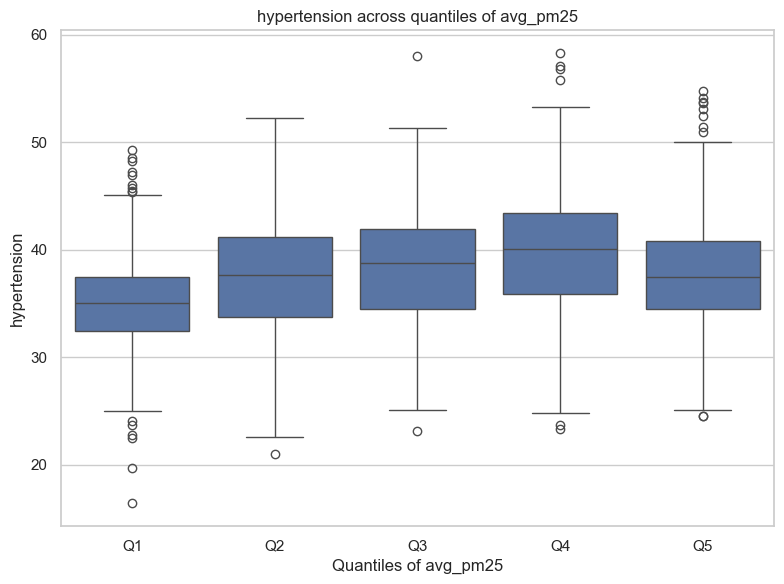

In [11]:
# Quantile Boxplots
pairs = [
    ("avg_pm25", "diabetes"),
    ("avg_pm25", "hypertension")
]
for x, y in pairs:
    if x not in df.columns or y not in df.columns:
        continue
        
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=pd.qcut(df[x], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"]), y=y, data=df)
    plt.title(f"{y} across quantiles of {x}")
    plt.xlabel(f"Quantiles of {x}")
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

## 5. Correlation Matrix

A correlation matrix summarizes pairwise linear relationships across the set of variables and helps identify strong associations and multicollinearity among predictors.

We compute Pearson correlations for continuous variables and display them in a heatmap for quick inspection. 

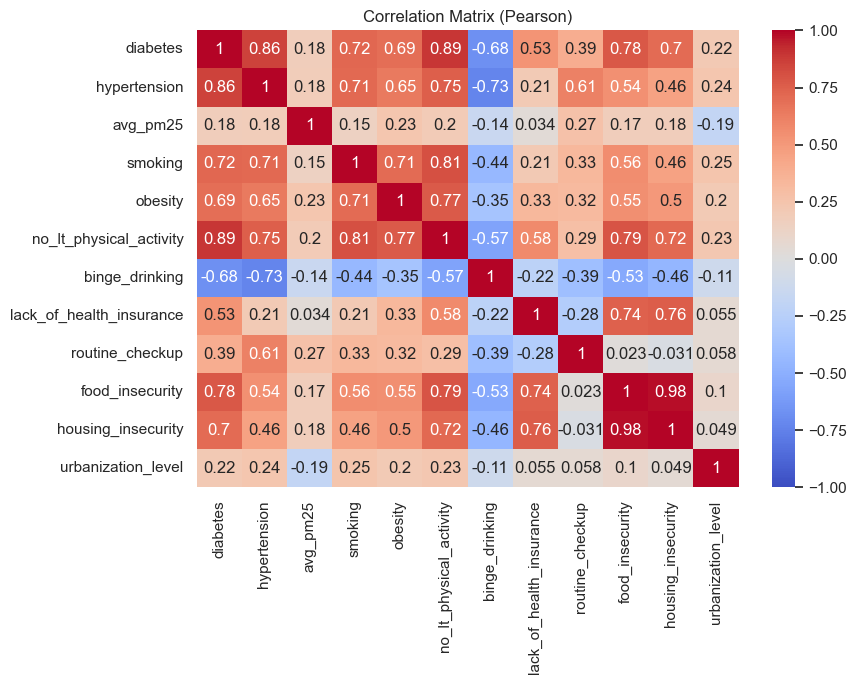

In [12]:
corr_mat = df[variables_of_interest].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()

## 6. Pairplot

A pairplot provides a compact visual summary of marginal distributions (diagonal) and pairwise scatterplots (off-diagonal) for a subset of variables. It is useful for simultaneously assessing distribution shapes, linear or non-linear relationships, and potential outliers or clusters.

<Figure size 3000x3000 with 0 Axes>

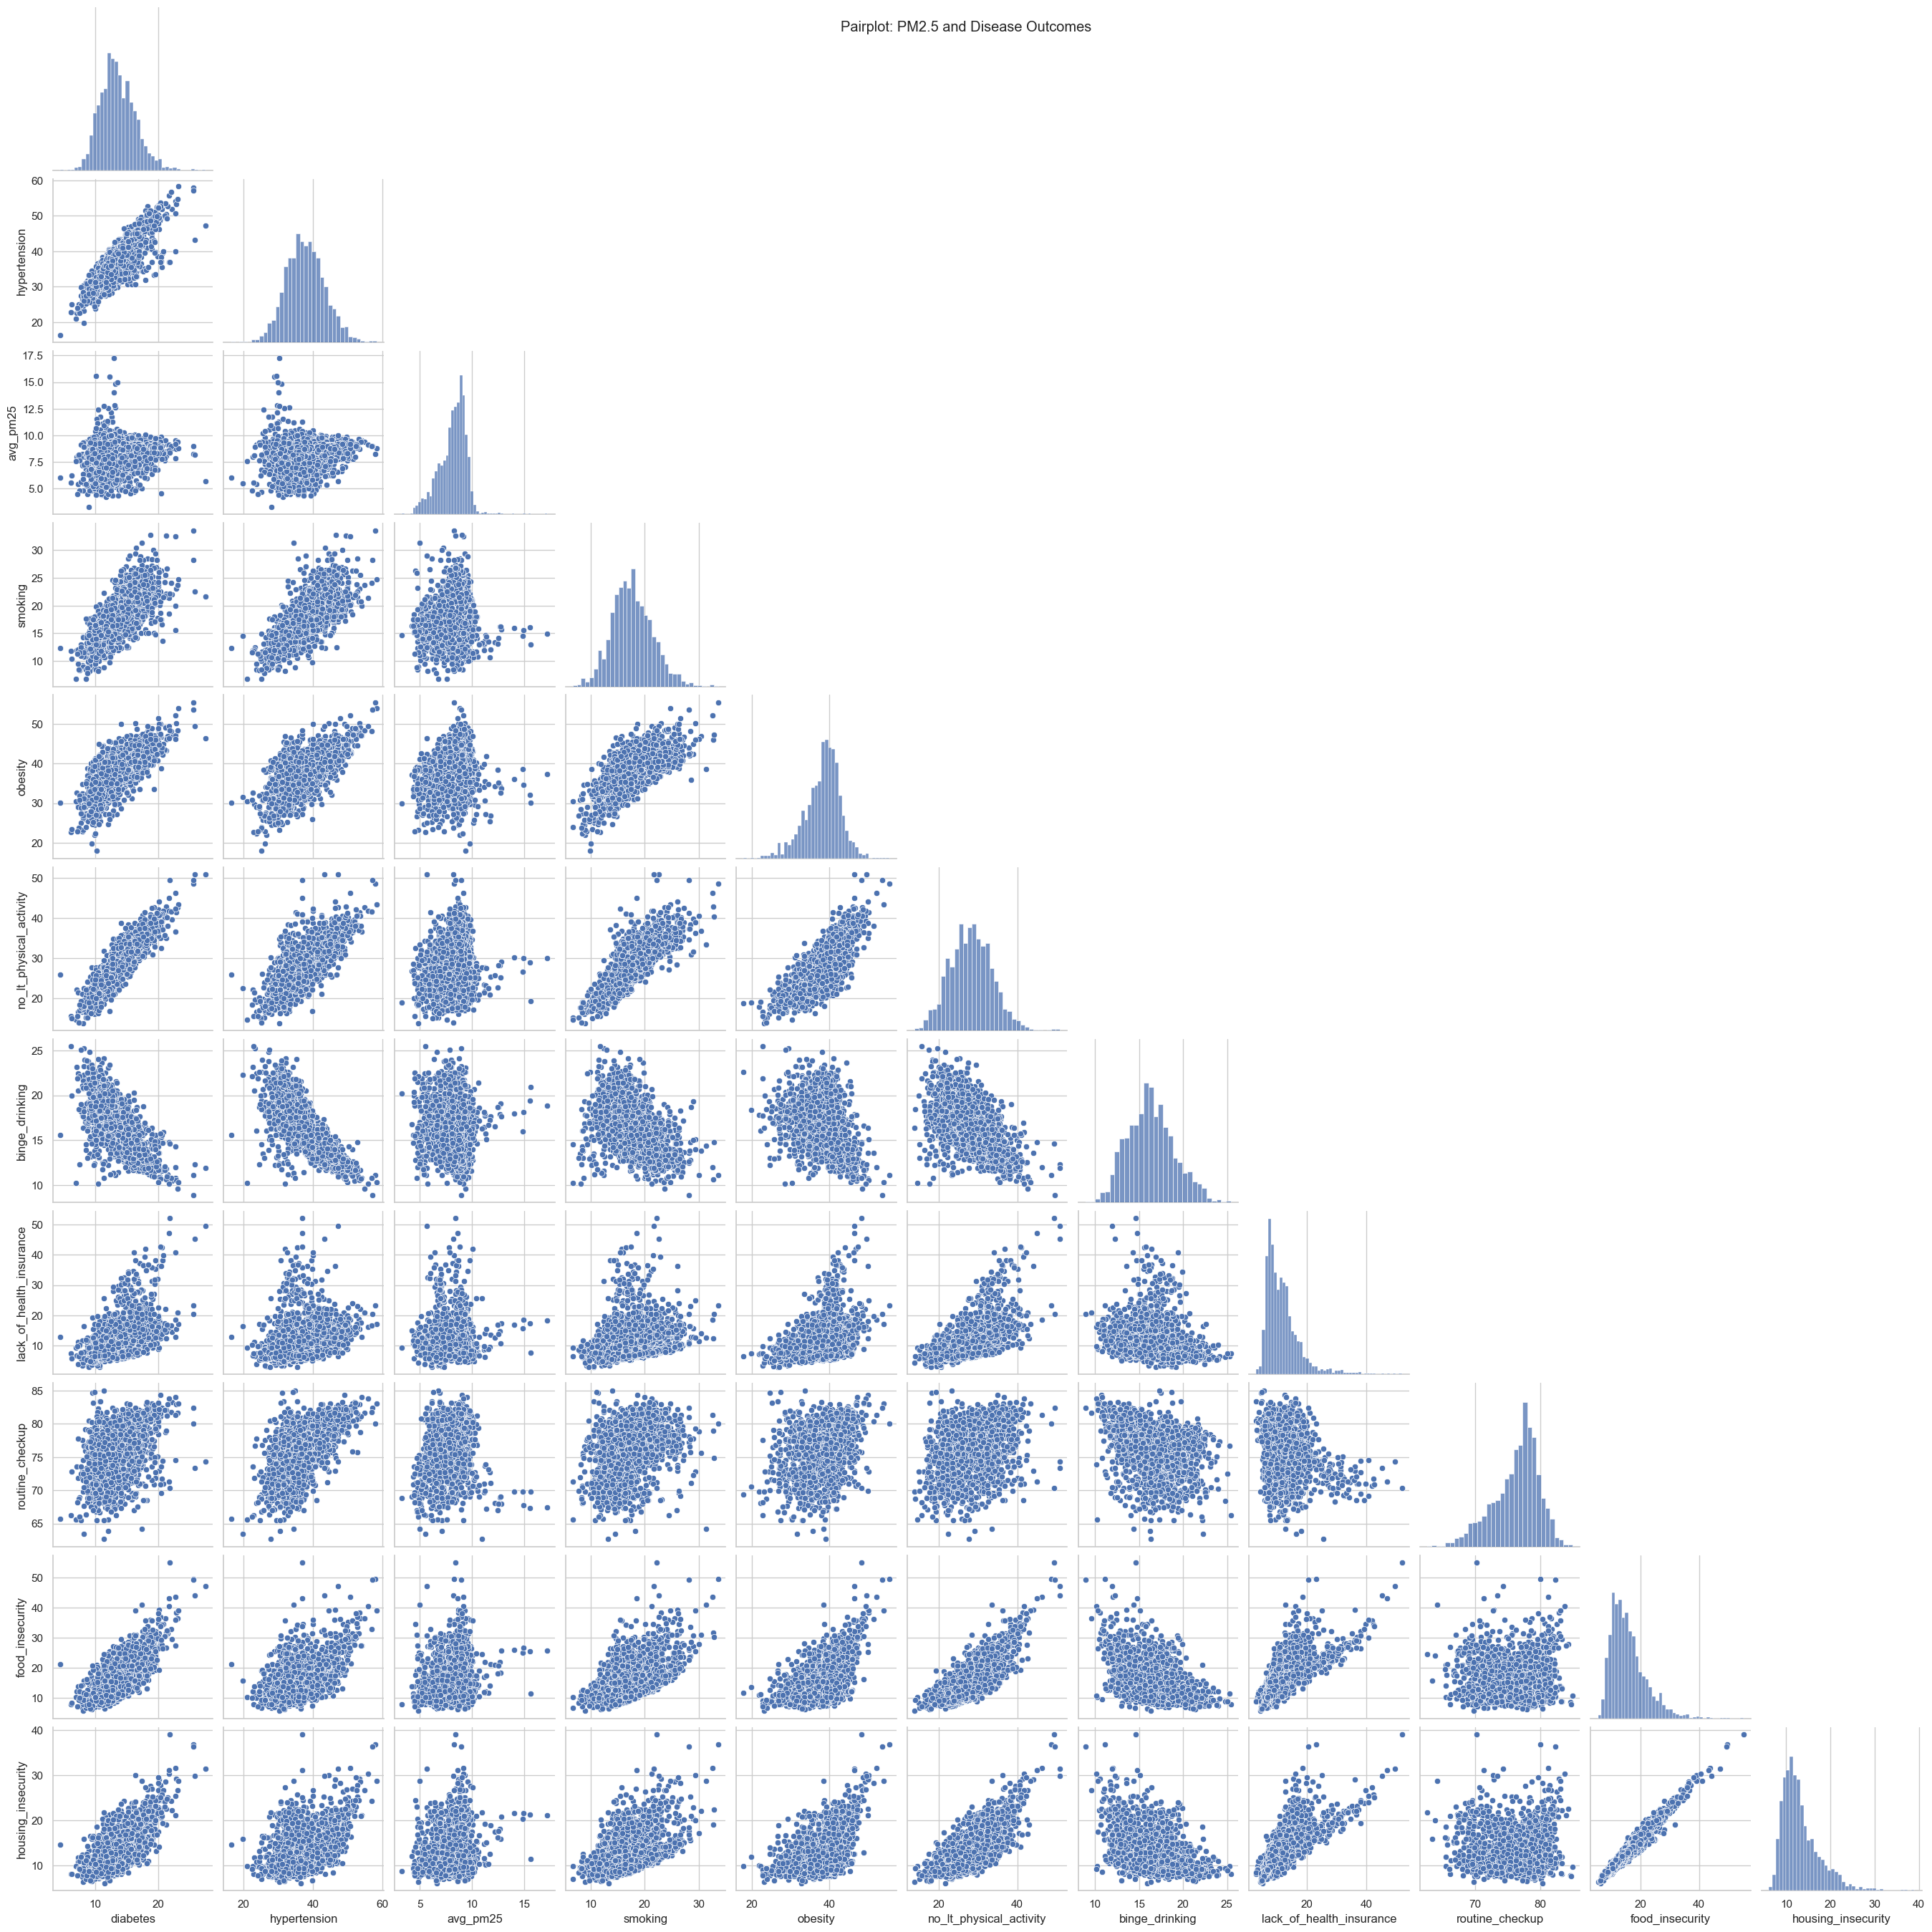

In [13]:
plt.figure(figsize=(30, 30))
sns.pairplot(df[variables_of_interest[:-1]], corner=True)
plt.suptitle("Pairplot: PM2.5 and Disease Outcomes")
plt.show()

## 7. Urbanization Disparity Analysis

This section investigates how urbanization levels may modify the relationship between PM2.5 exposure and health outcomes. We will stratify the data by urbanization categories and analyze disease prevalence across PM2.5 levels within each category.

In [14]:
# Create urban and rural categories based on urbanizaton_level which is between 1 and 6
df['urban_category'] = df['urbanization_level'].apply(
    lambda x: 'Urban' if x in [1, 2, 3] else 'Rural'
    )

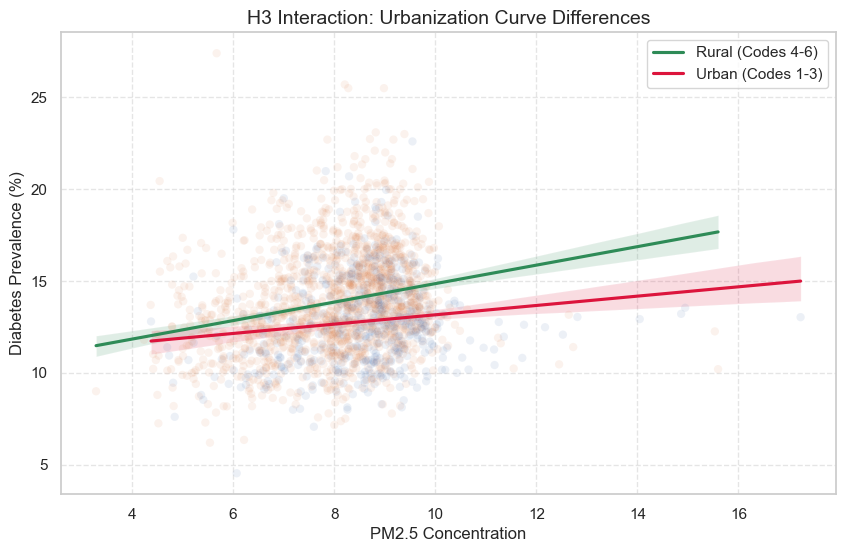

In [15]:
plt.figure(figsize=(10, 6))

# Plot Rural
sns.regplot(
    data=df[df['urban_category'] == 'Rural'], 
    x='avg_pm25', 
    y='diabetes', 
    scatter=False,
    label='Rural (Codes 4-6)', 
    color='seagreen'
)
# Plot Urban
sns.regplot(
    data=df[df['urban_category'] == 'Urban'], 
    x='avg_pm25', 
    y='diabetes', 
    scatter=False, 
    label='Urban (Codes 1-3)', 
    color='crimson'
)
sns.scatterplot(data=df, x='avg_pm25', y='diabetes', hue='urban_category', alpha=0.1, legend=False)
plt.title('H3 Interaction: Urbanization Curve Differences', fontsize=14)
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 8. Summary of Exploratory Findings

The exploratory data analysis phase has established a robust baseline for investigating the intersection of environmental quality and public health. Through univariate and bivariate assessments, the following key insights were identified:

* **Environmental Correlation:** Initial visualizations and correlation matrices confirm a consistent positive association between average $PM_{2.5}$ concentrations and the prevalence of both diabetes and hypertension across the dataset.
* **Geographic Disparity:** The preliminary stratification of data by NCHS urbanization codes reveals visible differences in the disease burden across geographic contexts. Specifically, regression slopes suggest that rural and urban environments respond differently to shifts in air quality, providing a strong foundation for further testing urbanization as an effect modifier.
* **Behavioral Confounders:** Multivariate exploration through heatmaps highlights the significant influence of lifestyle factors, such as smoking and obesity, which correlate strongly with chronic disease outcomes. These findings emphasize the necessity of accounting for these variables to isolate the independent impact of air pollution.
* **Data Readiness:** The dataset has been successfully validated for normality, variance, and completeness. With these foundational trends established, the analysis will transition from observational exploration to predictive modeling to confirm the effects of these risks and evaluate model prediction accuracy.